In [13]:
from dolfin import *
import matplotlib.pyplot as plt

In [14]:
if has_linear_algebra_backend("Epetra"):
    parameters["linear_algebra_backends"] = "Epetra"

In [15]:
# Subdomain for Dirichlet boundary condition
class RightBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary

In [28]:
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32, "crossed")
V = FunctionSpace(mesh, 'Lagrange', 1)

In [29]:
# Define boundary condition
bc = DirichletBC(V, Constant(1.0), RightBoundary())

In [30]:
# Define variational problem
u = Function(V)
v = TestFunction(V)
f = Expression("x[0] * sin(x[1])", degree=2)    # external source
F = inner((1 + u**2)*grad(u), grad(v))*dx - f*v*dx

In [31]:
# Compute solution
solve(F == 0, u, bc, solver_parameters={"newton_solver": {"relative_tolerance": 1E-6}})

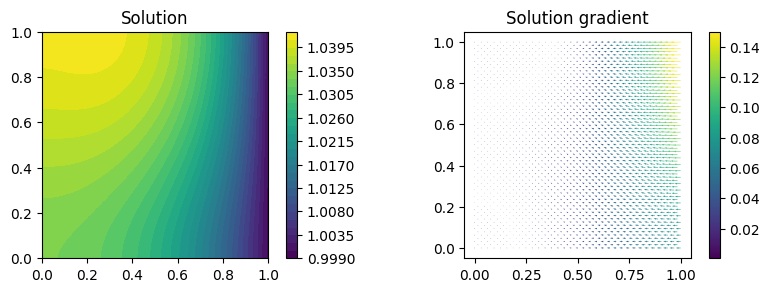

In [32]:
# Plot solution and solution gradient
plt.figure(figsize=(10, 3.0), dpi=100)
plt.subplot(1,2,1); plt.colorbar(plot(u, title="Solution"));
plt.subplot(1,2,2); plt.colorbar(plot(grad(u), title="Solution gradient"))
